In [2]:
%aiida

Loaded AiiDA DB environment - profile name: quicksetup.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import aiida_nanotech_empa.utils.gaussian_wcs_postprocess as pp

from aiida_custom_workflows import utils

# workchains

In [4]:
workchains = [
    [1515,  "benz-diradical STO-3G localhost"],
    [8769,  "di-phenalenyl PBE 6-311+G** tigu"],
# running
    [11188,  "di-phenalenyl B3LYP STO-3G localhost"],
    [11318,  "di-phenalenyl PBEPBE/D3 6-311+G** euler"],
]

In [29]:
utils.wc_overview(load_node(11318))

11318  GaussianSpinWorkChain 0
    11810 natural orbitals pop GaussianNatOrbWorkChain 0
        11819  process_natural_orb_occupations 0
        11814 naturalorbitals population GaussianBaseWorkChain 0
            11815  GaussianCalculation 0
    11699 m3_vert GaussianScfWorkChain 0
        11775  GaussianCubesWorkChain 0
            11795  CubegenCalculation 0
            11782  FormchkCalculation 0
        11722 scf GaussianBaseWorkChain 0
            11727  GaussianCalculation 0
    11691 m0_vert GaussianScfWorkChain 0
        11753  GaussianCubesWorkChain 0
            11789  CubegenCalculation 0
            11756  FormchkCalculation 0
        11718 scf GaussianBaseWorkChain 0
            11726  GaussianCalculation 0
    11683 delta scf GaussianDeltaScfWorkChain 0
        11779  subtract 0
        11777  subtract 0
        11767  subtract 0
        11714  GaussianBaseWorkChain 0
            11725  GaussianCalculation 0
        11710  GaussianBaseWorkChain 0
            11724  Gauss

In [16]:
n = load_node(11087)

In [17]:
list(n.outputs)

['cube_image_folder', 'remote_folder', 'retrieved']

In [30]:
wc_node = load_node(11318)

Functional: PBEPBE
Basis set OPT: 6-311G**
Basis set SCF: 6-311+G**
Multplicity list: [0, 1, 3]

##############################################################
#### GROUND STATE: MULTIPLICITY 1
##############################################################


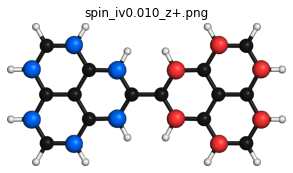

Energy (eV): -27195.0453

IP    (eV):   5.6989
EA    (eV):   2.0739 (accurate only with a diffuse basis)
IP-EA (eV):   3.6250

S**2: 0.939, ideal: 0.00
S:    0.590, ideal: 0.00

MO energies:
     i_orb       E(up) (eV)   occ(up)     E(down) (eV) occ(down)
        89          -1.4517         0          -1.4517         0
        88          -1.4667         0          -1.4667         0
        87          -2.1004         0          -2.1004         0
        86          -3.5541         0          -3.5541         0
        85          -4.1745         1          -4.1745         1
        84          -5.7035         1          -5.7035         1
        83          -6.2921         1          -6.2921         1
        82          -6.3038         1          -6.3038         1
GAP:       0.6204 eV
GAP alpha: 0.6204 eV
GAP beta:  0.6204 eV


Natural orbital occupation analysis:
                i_no              occ    sp. proj. occ
                  89           0.0022           0.0000
            

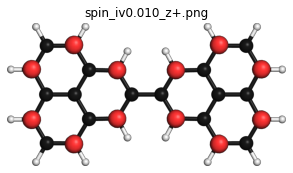


adia. exc (meV):     37.5
vert. exc (meV):     38.2

S**2: 2.029, ideal: 2.00
S:    1.010, ideal: 1.00

MO energies:
     i_orb       E(up) (eV)   occ(up)     E(down) (eV) occ(down)
        89          -1.4520         0          -1.3268         0
        88          -1.5353         0          -1.3369         0
        87          -2.2221         0          -1.9932         0
        86          -4.0716         1          -3.4602         0
        85          -4.2564         1          -3.6613         0
        84          -5.8270         1          -5.5756         1
        83          -6.4252         1          -6.2654         1
        82          -6.4548         1          -6.2861         1
GAP:       0.4103 eV
GAP alpha: 1.8496 eV
GAP beta:  1.9143 eV




In [31]:
pp.make_report(wc_node, nb=True)

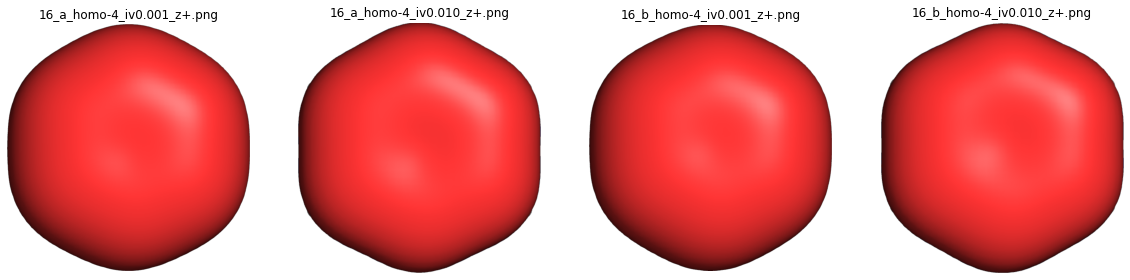

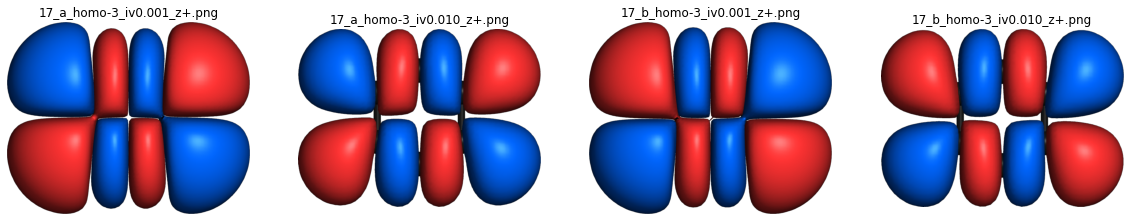

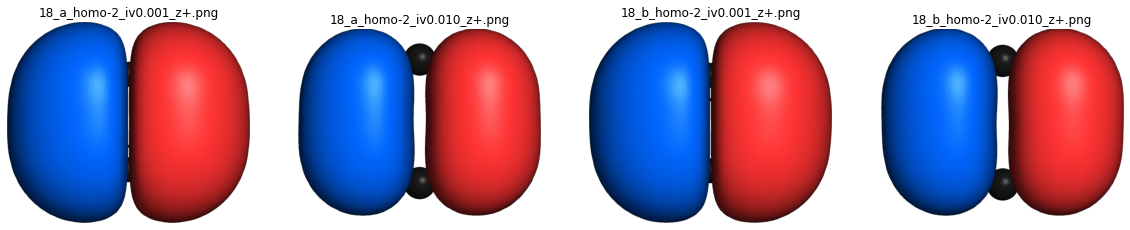

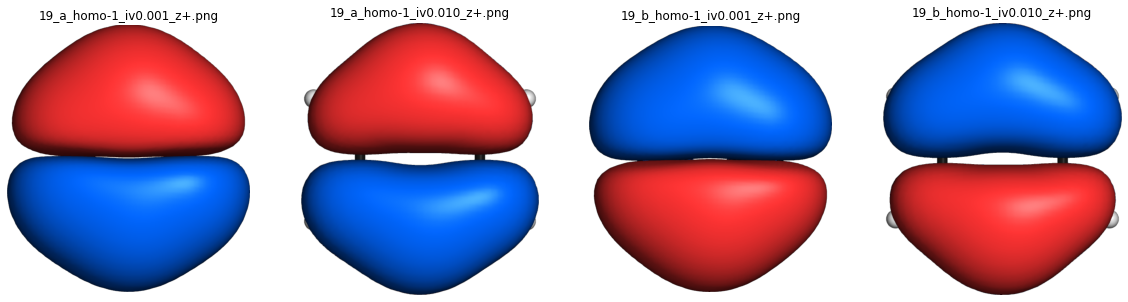

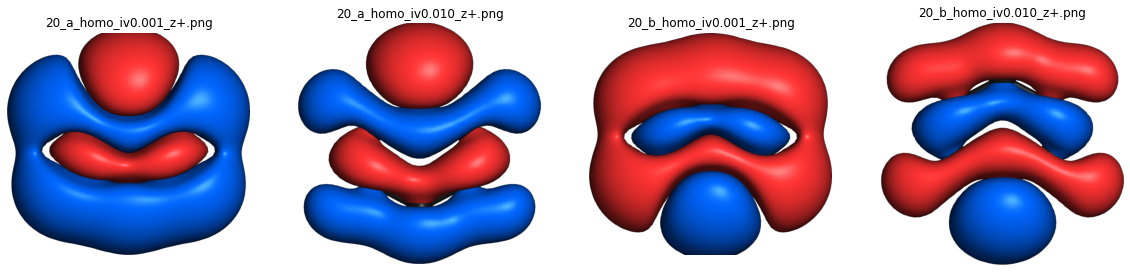

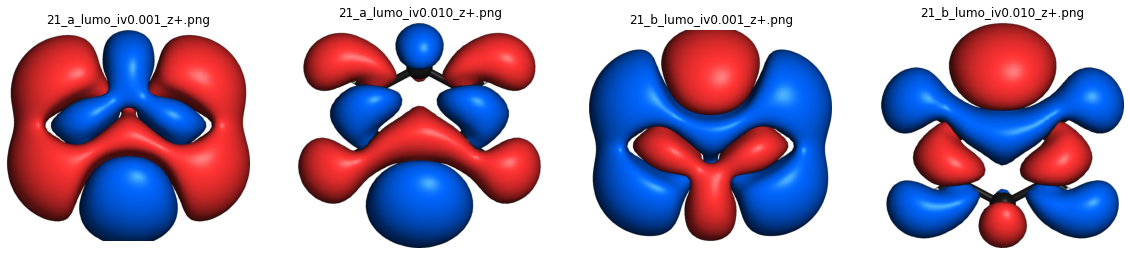

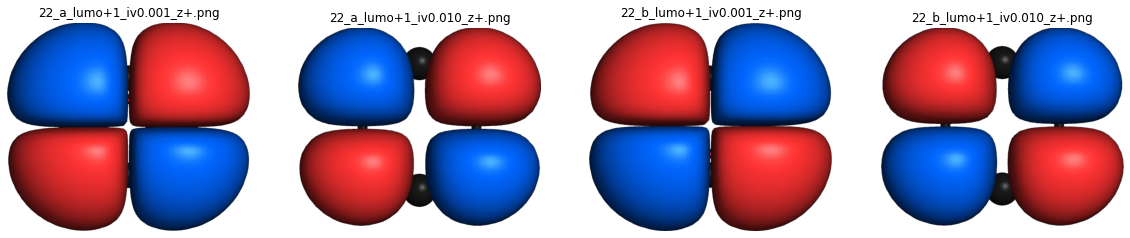

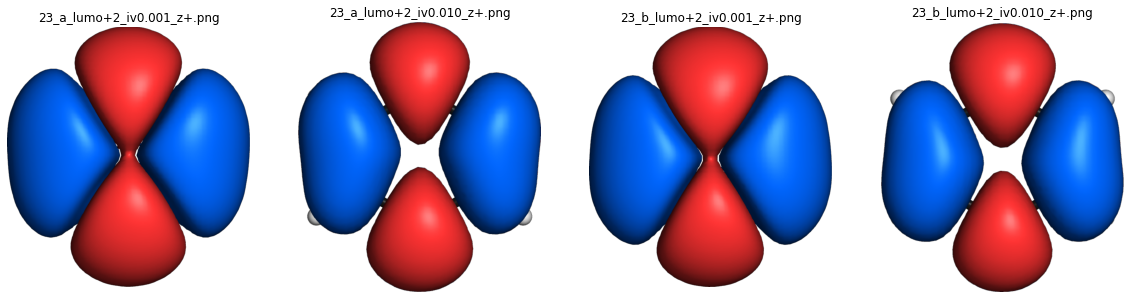

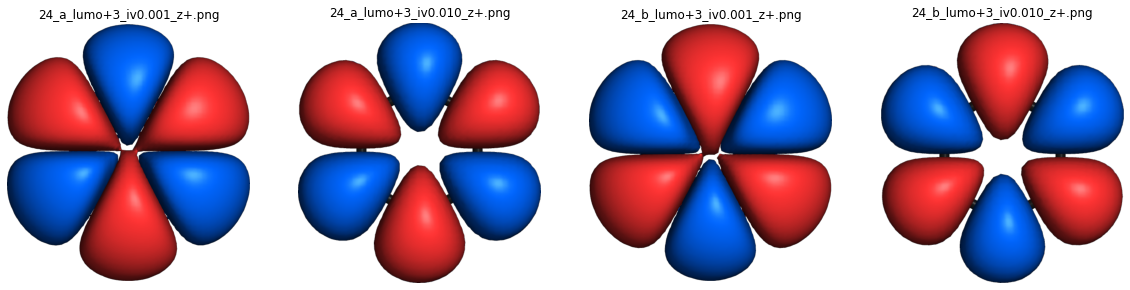

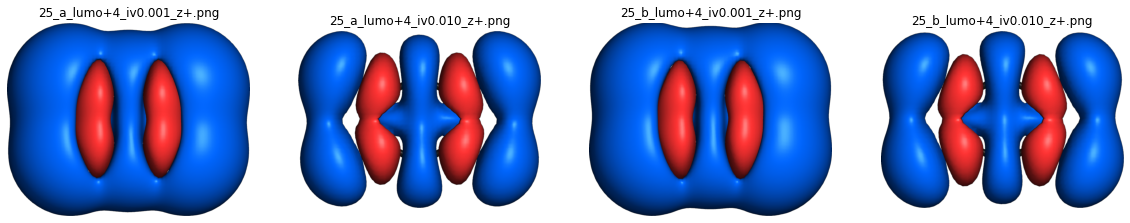

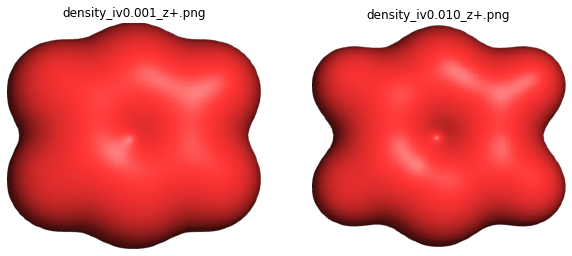

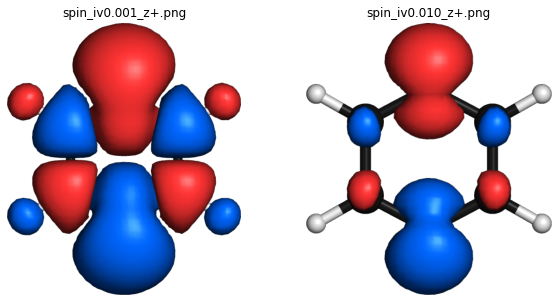

In [6]:
pp.plot_cube_images(wc_node.outputs.gs_cube_images, name_contains=['z+'])
#,save_image_loc='fig/', save_prefix=f"{wc_node.pk}_")